### Plot reduced iSHELL spectra

Note the following from the FITS header:<br>

Spextool FITS files contain an array of size [nwaves,4,norders*naps]. The ith image (array[*,*,i]) contains the data for a single extraction aperture within an order such that<br>
lambda=array[*,0,i] <br>
flux=array[*,1,i] <br>
uncertainty=array[*,2,i] <br>
flag=array[*,3,i] <br>
The zeroth image (array[*,*,0]) contains the data for the aperture in the order closest to the bottom of the detector that is closest to the bottom of the slit (i.e. also closest to the bottom of the detector).  Moving up the detector, the FITS array is filled in with subsequent extraction apertures.  If no orders have been deselected in the extraction process, the contents of the ith aperture in order j can be found as follows:<br>
lambda=array[*,0,{j-min(orders)}*naps + (i-1)] <br>
flux=array[*,1,{j-min(orders)}*naps + (i-1)] <br>
uncertainty=array[*,2,{j-min(orders)}*naps + (i-1)] <br>
flag=array[*,3,{j-min(orders)}*naps + (i-1)]<br>

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii, fits
from matplotlib.gridspec import GridSpec
from scipy import interpolate
%matplotlib inline

In [22]:
# load atmospheric transmission file (R=3000 resolution)
path = '/Users/jpw/idl/Spextool/data/'
file = 'atran75000'
hdu = fits.open(path+file+'.fits')
tdata = hdu[0].data
atrans = interpolate.interp1d(tdata[0,:], tdata[1,:])

In [23]:
# load in the data
#print(f'Loading in {source}')
path = '/Users/jpw/NG/iSHELL/adwin/191008/reduced/'
hdu = fits.open(path+'cDRTau_PA90.fits')
hdu.info()
data = hdu[0].data
hd = hdu[0].header
#print(hd)

Filename: /Users/jpw/NG/iSHELL/adwin/191008/reduced/cDRTau_PA90.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     171   (1995, 4, 16)   float32   


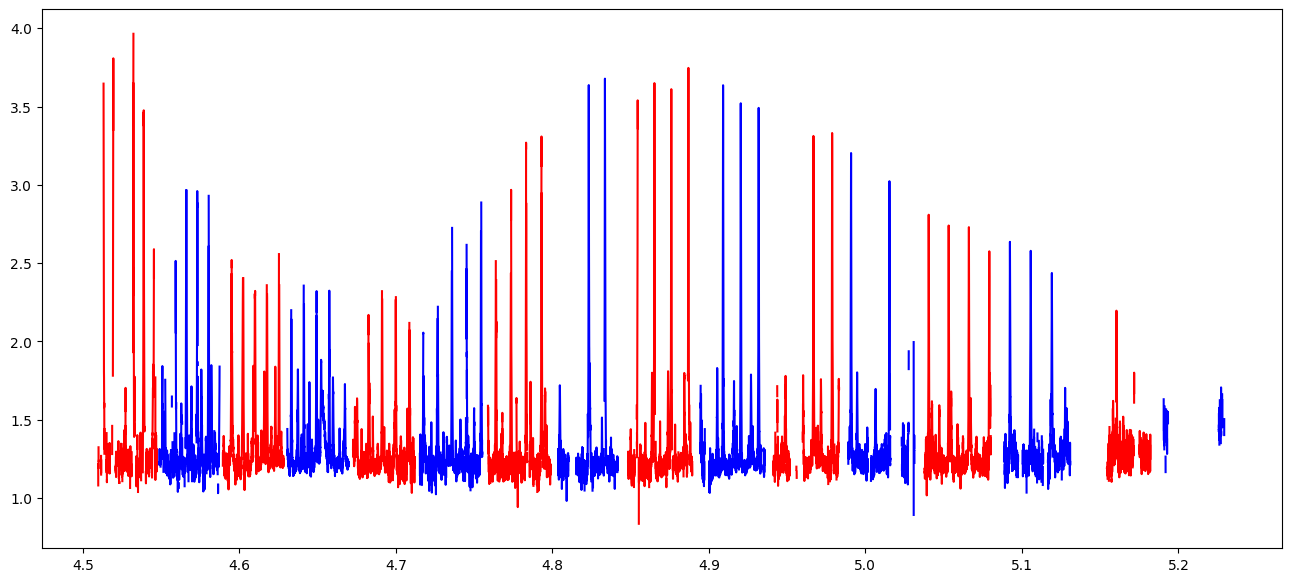

In [24]:
# recreate xvspec plot
fig, ax = plt.subplots(figsize=(16,7))
col = ['blue', 'red']
for order in range(16):
    wl = data[order, 0, :]
    flux = data[order, 1, :]
    ax.plot(wl, flux, color=col[order%2])

[Text(1, -400, ''),
 Text(1, -300, ''),
 Text(1, -200, ''),
 Text(1, -100, ''),
 Text(1, 0, '0'),
 Text(1, 100, '100')]

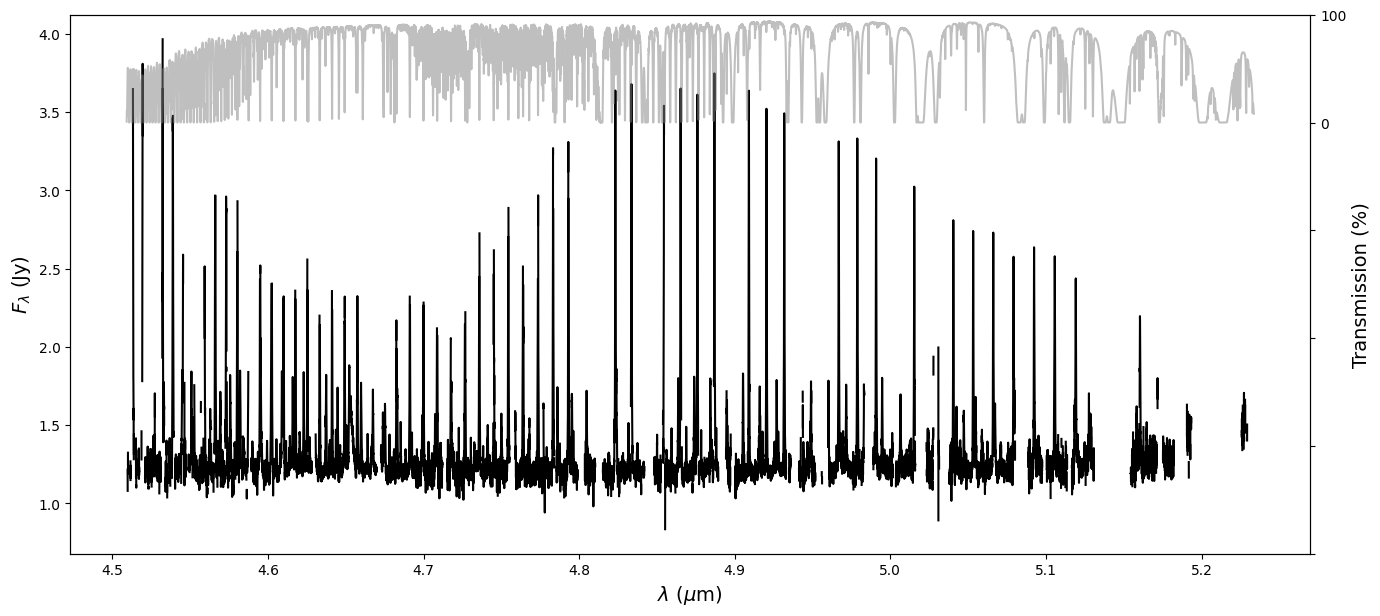

In [26]:
# show the transmission
fig, ax = plt.subplots(figsize=(16,7))
wl_min = 999
wl_max = 0
for order in range(16):
    wl = data[order, 0, :]
    if (np.nanmin(wl) < wl_min): wl_min = np.nanmin(wl)
    if (np.nanmax(wl) > wl_max): wl_max = np.nanmax(wl)
    flux = data[order, 1, :]
    ax.plot(wl, flux, color='k')

ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=14)
ax.set_ylabel(r'$F_\lambda$ (Jy)', fontsize=14)
#ax.text(0.05, 0.7, source, fontsize=24, transform=ax1.transAxes)

axr = ax.twinx()
delta_wlt = 3.5 / 75000
wlt = np.arange(wl_min, wl_max, delta_wlt)
axr.plot(wlt, 100*atrans(wlt), '-', color='gray', alpha=0.5)

axr.set_ylabel(r'Transmission (%)', fontsize=14)
axr.set_ylim(-400,100)
axr.set_yticks([-400,-300,-200,-100,0,100])
axr.set_yticklabels(['','','','','0','100'])